In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the PNG image using PIL
id = "00000003"
pred_loc_path = "submission/guatemala-volcano_"+id+"_localization_disaster_prediction.png"
pred_dmg_path = "submission/guatemala-volcano_"+id+"_damage_disaster_prediction.png"
label_loc_path = "test/targets/guatemala-volcano_"+id+"_pre_disaster_target.png"
label_dmg_path = "test/targets/guatemala-volcano_"+id+"_post_disaster_target.png"

pred_loc = Image.open(pred_loc_path)
pred_dmg = Image.open(pred_dmg_path)
label_loc = Image.open(label_loc_path)
label_dmg = Image.open(label_dmg_path)

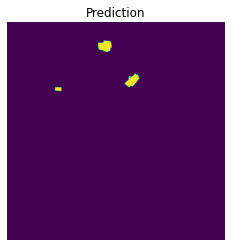

In [2]:
# Plot the image using matplotlib
plt.imshow(pred_loc)
plt.title("Prediction")
plt.axis("off")  # Turn off axes
plt.show()

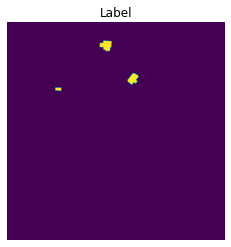

In [106]:
# Plot the image using matplotlib
plt.imshow(label_loc)
plt.title("Label")
plt.axis("off")  # Turn off axes
plt.show()

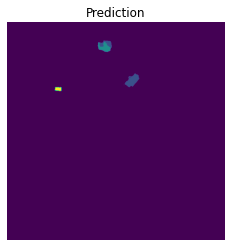

In [107]:
# Plot the image using matplotlib
plt.imshow(pred_dmg)
plt.title("Prediction")
plt.axis("off")  # Turn off axes
plt.show()

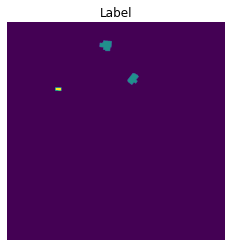

In [108]:
# Plot the image using matplotlib
plt.imshow(label_dmg)
plt.title("Label")
plt.axis("off")  # Turn off axes
plt.show()

In [109]:
unique_pred_loc, counts_pred_loc = np.unique(np.array(pred_loc).flatten(), return_counts=True)
unique_label_loc, counts_label_loc = np.unique(np.array(label_loc).flatten(), return_counts=True)

unique_pred_dmg, counts_pred_dmg = np.unique(np.array(pred_dmg).flatten(), return_counts=True)
unique_label_dmg, counts_label_dmg = np.unique(np.array(label_dmg).flatten(), return_counts=True)

print("> Localization")
print("Predict statistics",dict(zip(unique_pred_loc, counts_pred_loc)))
print("Label statistics",dict(zip(unique_label_loc, counts_label_loc)))

print("> Classification")
print("Predict statistics",dict(zip(unique_pred_dmg, counts_pred_dmg)))
print("Label statistics",dict(zip(unique_label_dmg, counts_label_dmg)))

> Localization
Predict statistics {0: 1043078, 1: 5498}
Label statistics {0: 1044472, 1: 4104}
> Classification
Predict statistics {0: 1043078, 1: 3403, 2: 1581, 4: 514}
Label statistics {0: 1044472, 2: 3698, 4: 406}


In [110]:
from utils import *

In [111]:
dice_score = dice(pred_loc,label_loc)
print(dice_score)

0.8035825869610498


In [115]:
import numpy as np
from sklearn.metrics import f1_score

def calculate_f1_score(ground_truth, predictions):
    """
    Calculate the F1 score from given ground truth and prediction arrays.

    Returns:
    float: F1 score.
    """
    # Flatten the arrays to 1D arrays
    ground_truth_flat = ground_truth.ravel()
    predictions_flat = predictions.ravel()

    # Calculate the F1 score
    f1 = f1_score(ground_truth_flat, predictions_flat)
    return f1

import numpy as np
from sklearn.metrics import f1_score

def calculate_classwise_f1_harmonic_mean(ground_truth, predictions, num_classes=5):
    """
    Calculate the harmonic mean of class-wise damage classification F1 (F1d).

    Parameters:
    ground_truth (numpy.ndarray): 2D array of ground truth labels (0 to num_classes-1).
    predictions (numpy.ndarray): 2D array of predicted labels (0 to num_classes-1).
    num_classes (int): Number of classes.

    Returns:
    float: Harmonic mean of class-wise F1 scores.
    """
    classwise_f1_scores = []
    
    for class_label in range(num_classes):
        class_ground_truth = (ground_truth == class_label).astype(int)
        class_predictions = (predictions == class_label).astype(int)
        
        class_f1 = f1_score(class_ground_truth.ravel(), class_predictions.ravel())
        classwise_f1_scores.append(class_f1)
    
    harmonic_mean = np.sum(classwise_f1_scores) ** -1
    return harmonic_mean

loc_score = calculate_f1_score(np.array(label_loc),np.array(pred_loc)).round(3)
dmg_score = calculate_classwise_f1_harmonic_mean(np.array(label_dmg),np.array(pred_dmg)).round(3)
overall_score = (loc_score*0.3 + dmg_score*0.7).round(3)
print("Localization F1-Score:",loc_score)
print("Classification F1-Score:",dmg_score)
print("Overall Score:",overall_score)

Localization F1-Score: 0.804
Classification F1-Score: 0.443
Overall Score: 0.551


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [121]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(np.array(label_dmg).ravel(), np.array(pred_dmg).ravel()))

/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1044472
           1       0.00      0.00      0.00         0
           2       0.62      0.27      0.37      3698
           4       0.79      1.00      0.88       406

    accuracy                           1.00   1048576
   macro avg       0.60      0.57      0.56   1048576
weighted avg       1.00      1.00      1.00   1048576



/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


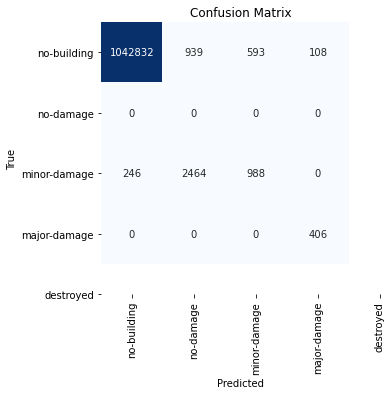

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(confusion_matrix, labels, title='Confusion Matrix', cmap='Blues'):
    
    plt.figure(figsize=(len(labels), len(labels)))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Example usage
ground_truth = np.array([0, 1, 1, 0, 2, 2, 3, 1, 0])
predictions = np.array([0, 1, 1, 0, 1, 2, 3, 1, 2])
labels = ['no-building','no-damage', 'minor-damage', 'major-damage', 'destroyed']

confusion_matrix_result = confusion_matrix(np.array(label_dmg).ravel(), np.array(pred_dmg).ravel())
plot_confusion_matrix(confusion_matrix_result, labels)


In [127]:
confusion_matrix(np.array(label_dmg).ravel(), np.array(pred_dmg).ravel())

array([[1042832,     939,     593,     108],
       [      0,       0,       0,       0],
       [    246,    2464,     988,       0],
       [      0,       0,       0,     406]])

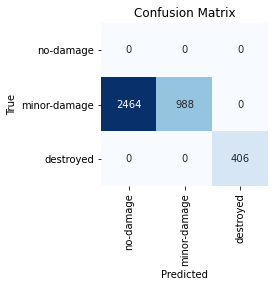

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_without_class(confusion_matrix, labels, class_to_ignore, title='Confusion Matrix', cmap='Blues'):
    """
    Plot a confusion matrix as a heatmap while ignoring a specific class.

    Parameters:
    confusion_matrix (numpy.ndarray): Confusion matrix.
    labels (list): List of label names.
    class_to_ignore (int): Index of the class to ignore.
    title (str): Title for the plot.
    cmap (str): Colormap for the heatmap.

    Returns:
    None
    """
    modified_confusion_matrix = np.delete(np.delete(confusion_matrix, class_to_ignore, axis=0), class_to_ignore, axis=1)
    modified_labels = labels[:class_to_ignore] + labels[class_to_ignore+1:]

    plt.figure(figsize=(len(modified_labels), len(modified_labels)))
    sns.heatmap(modified_confusion_matrix, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=modified_labels, yticklabels=modified_labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
# labels = ['no-building','no-damage', 'minor-damage', 'major-damage', 'destroyed']
labels = ['no-building','no-damage', 'minor-damage', 'destroyed']

confusion_matrix_result = confusion_matrix(np.array(label_dmg).ravel(), np.array(pred_dmg).ravel())
class_to_ignore = 0

plot_confusion_matrix_without_class(confusion_matrix_result, labels, class_to_ignore)


In [ ]:
pre_img_path = "test/images/guatemala-volcano_"+id+"_pre_disaster.png"
post_img_path = "test/images/guatemala-volcano_"+id+"_post_disaster.png"
pred_dmg_path = "submission/guatemala-volcano_"+id+"_damage_disaster_prediction.png"
label_dmg_path = "test/targets/guatemala-volcano_"+id+"_post_disaster_target.png"

In [18]:
from matplotlib.colors import ListedColormap
def visualise_prediction(disaster_name,tile_id):
    
    pre_img_path = "test/images/"+disaster_name+"_"+tile_id+"_pre_disaster.png"
    post_img_path = "test/images/"+disaster_name+"_"+tile_id+"_post_disaster.png"
    pred_img_path = "submission/"+disaster_name+"_"+tile_id+"_damage_disaster_prediction.png"
    label_img_path = "test/targets/"+disaster_name+"_"+tile_id+"_post_disaster_target.png"

    images_path = [pre_img_path,post_img_path,label_img_path,pred_img_path]
    images = []
    for image_path in images_path:
        images.append(Image.open(image_path))

    fig, axes = plt.subplots(1, 4, figsize=(22, 5), sharey=True)
    fontsize = 22
    #### PLOT IMAGES
    axes[0].imshow(images[0])
    axes[0].axis('off')
    axes[0].set_title("Pre-disaster", fontsize=fontsize)

    axes[1].imshow(images[1])
    axes[1].axis('off')
    axes[1].set_title("Post-disaster", fontsize=fontsize)

    #### PLOT MASKS
     # Define the custom colormap mapping values 0-4 to specified colors.
    damage_colors = ['black', 'green', 'yellow', 'orange', 'red']
    damage_cmap = ListedColormap(damage_colors)
    axes[2].imshow(images[2], cmap=damage_cmap, vmin=0, vmax=4)
    axes[2].axis('off')
    axes[2].set_title("Label", fontsize=fontsize)

    axes[3].imshow(images[3], cmap=damage_cmap, vmin=0, vmax=4)
    axes[3].axis('off')
    axes[3].set_title("Prediction", fontsize=fontsize)

    # plt.ylabel("Image", fontsize=fontsize)
    plt.subplots_adjust(wspace=0.3)
    plt.ylabel("Image")
    fig.supylabel("ID: "+disaster_name+'_'+str(int(tile_id)), fontsize=fontsize)
    plt.tight_layout()
    plt.show()

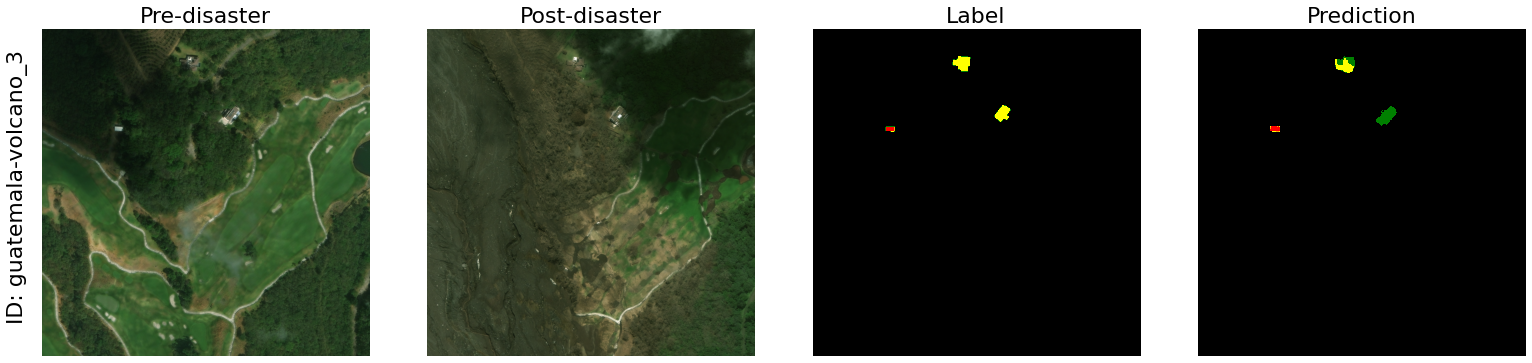

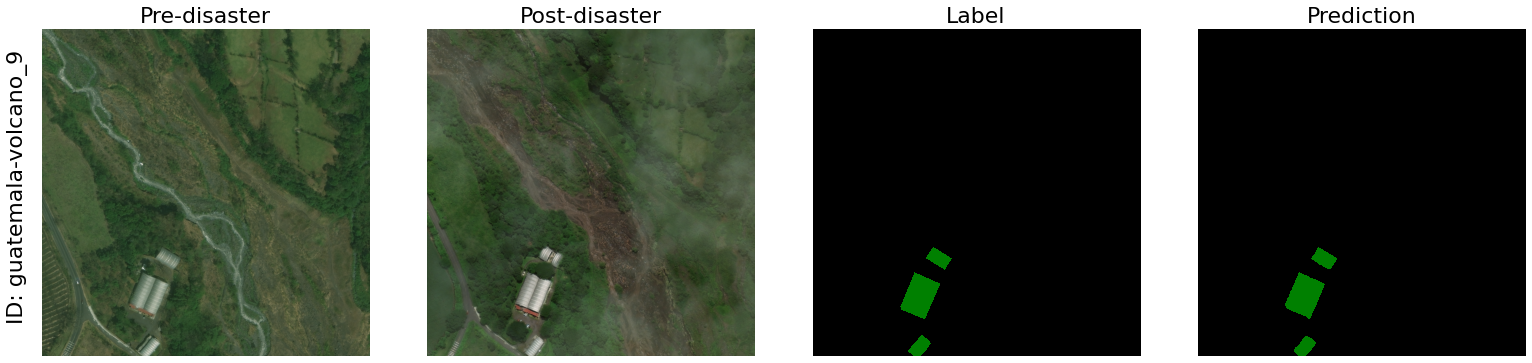

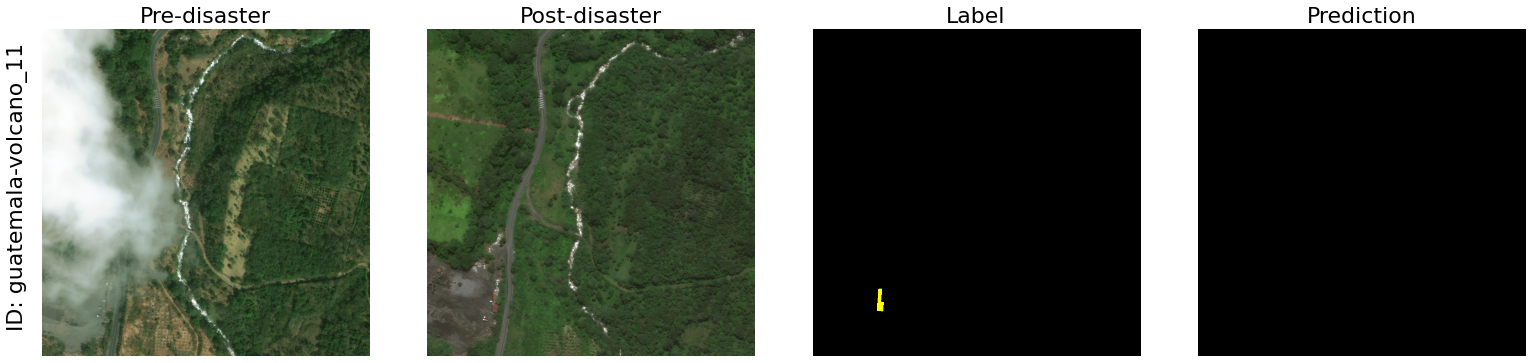

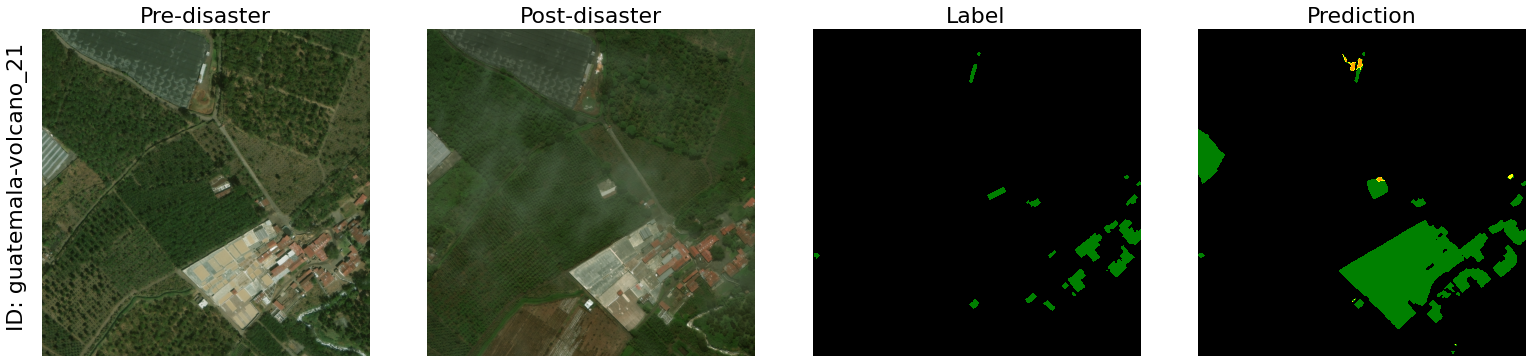

In [19]:
disaster_name = "guatemala-volcano"
visualise_prediction(disaster_name,"00000003")
# visualise_prediction("00000005")
visualise_prediction(disaster_name,"00000009")
visualise_prediction(disaster_name,"00000011")
visualise_prediction(disaster_name,"00000021")

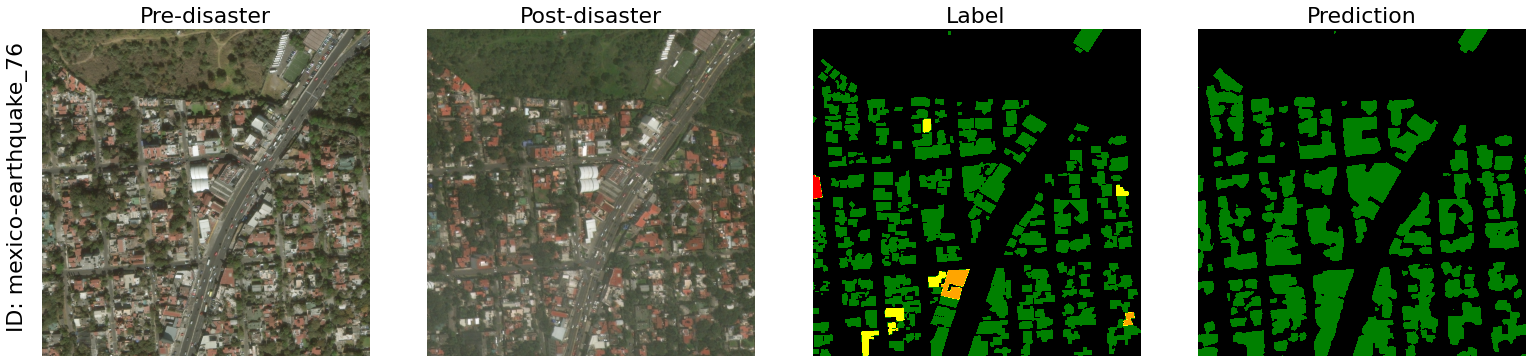

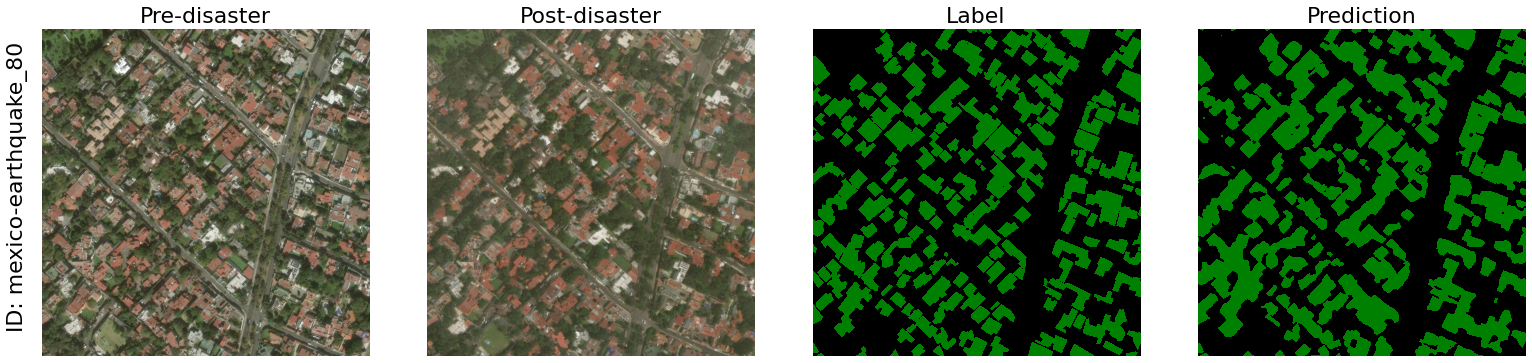

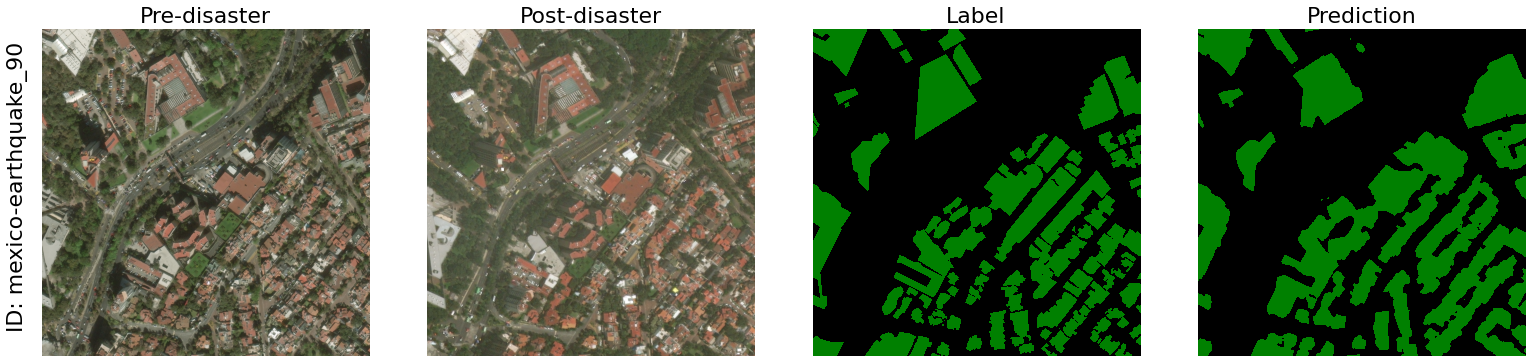

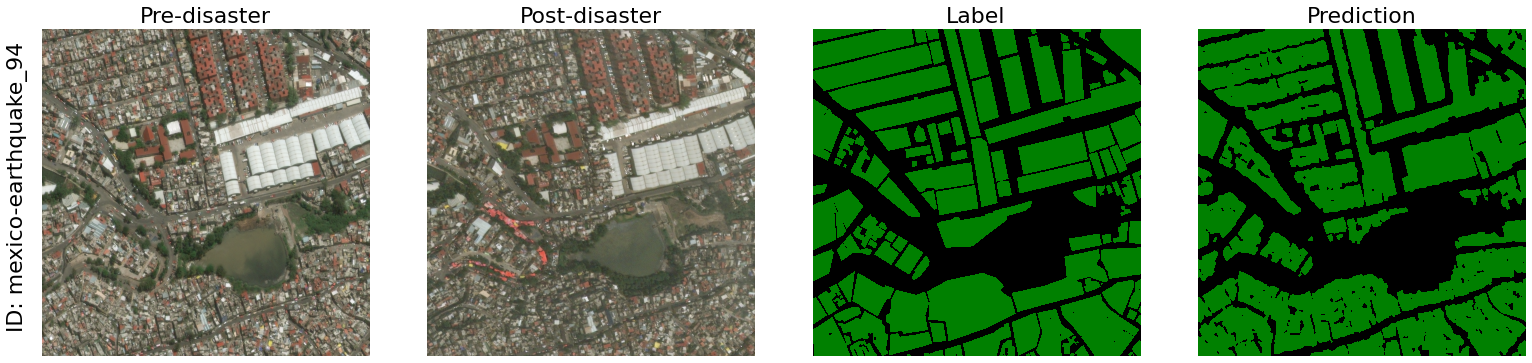

In [20]:
disaster_name = "mexico-earthquake"
visualise_prediction(disaster_name,"00000076")
visualise_prediction(disaster_name,"00000080")
visualise_prediction(disaster_name,"00000090")
visualise_prediction(disaster_name,"00000094")

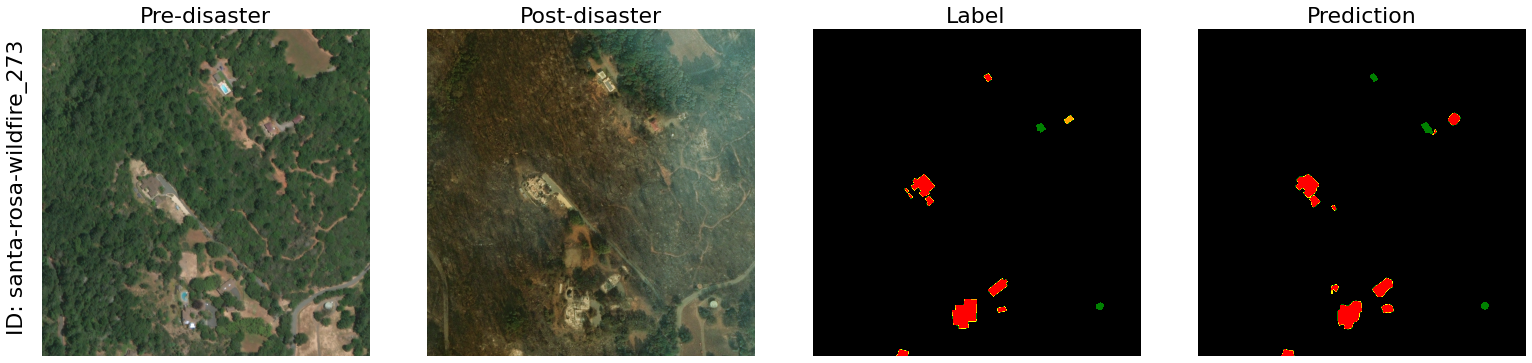

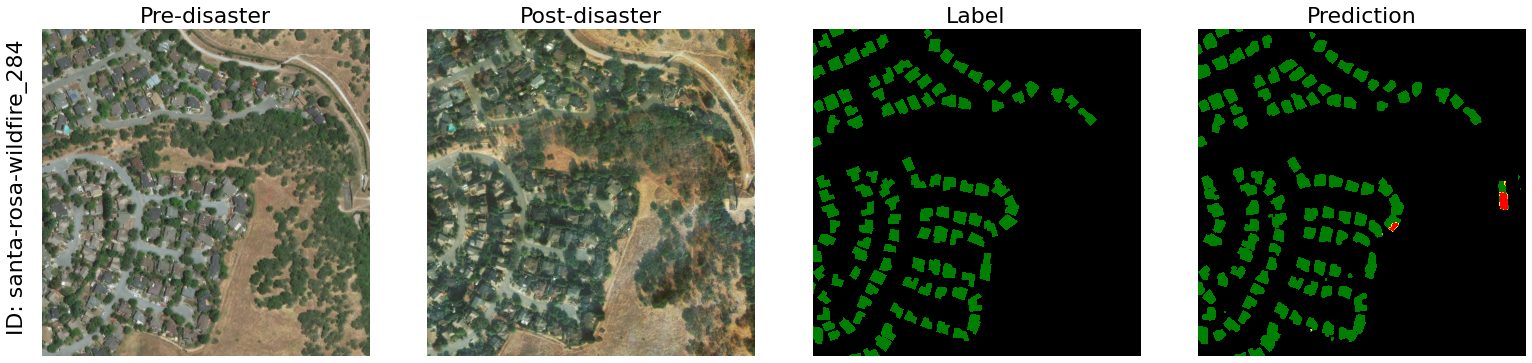

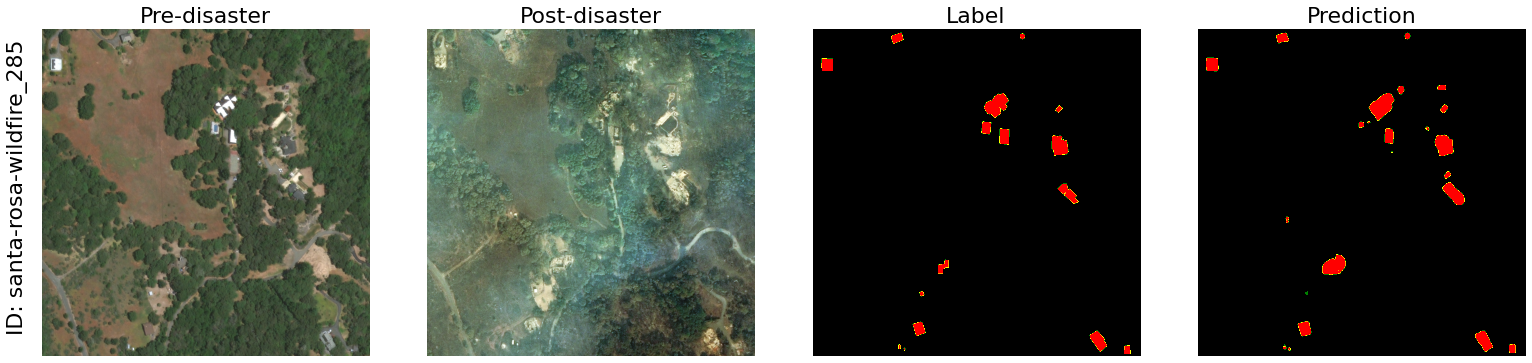

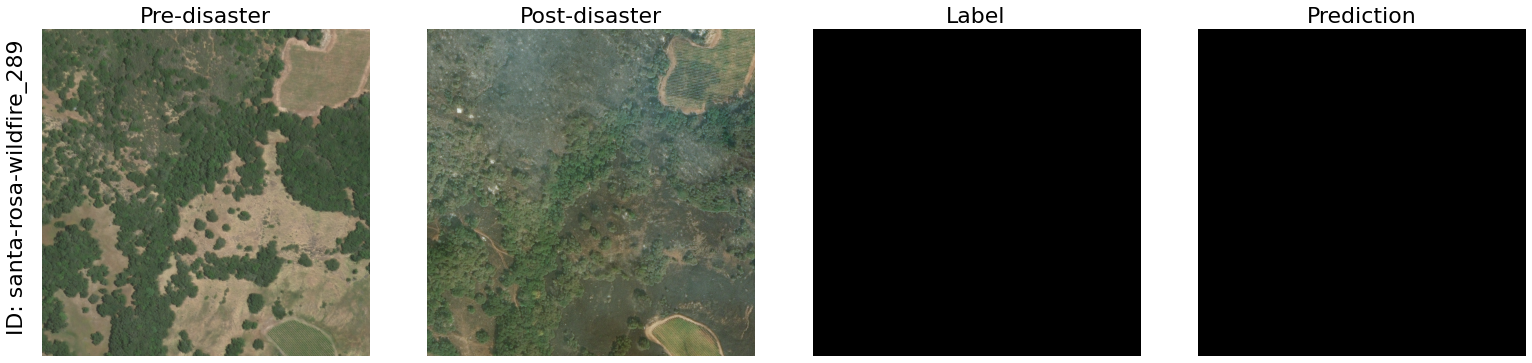

In [21]:
disaster_name = "santa-rosa-wildfire"
visualise_prediction(disaster_name,"00000273")
visualise_prediction(disaster_name,"00000284")
visualise_prediction(disaster_name,"00000285")
visualise_prediction(disaster_name,"00000289")